Wynik z met. analitycznej: 
0.43233235838169365

Wynik z met. prostokatow: 
0.36787944117144233

Wynik z prostego wzoru trapezow: 
0.5676676416183064

Wynik z prostego wzoru Simpsona: 
0.4344755079870637

Wynik ze zlozonego wzoru trapezow: 
0.43377250641846693

Wynik ze zlozonego wzoru Simpsona: 
0.43233259828070303

Wynik z metody romberga: 
0.43233235838943557

Wynik z metody quad: 
0.4323323583816936


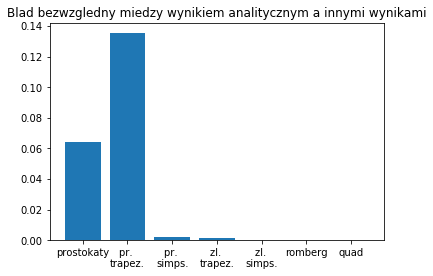

Do wyniku analitycznego najbardziej zblizone sa wyniki z metod: romberg, quad, wzoru zlozonego simpsona


In [1]:
#Anna Nagi
#zad 1
from math import e
from scipy.integrate import romberg, quad
import pylab

#f(x) = e^(-2x) na przedziale [0,1]

#1 - analitycznie
#calka z e^(-2x) = -e(-2x)/2 + c

#na przedziale [0,1] = 
print('Wynik z met. analitycznej: ')
wynik1 = -(e**(-2))/2 + 1/2
print(wynik1)

wyniki=[]

#2 - metoda prostokatow
a=0
b=1

funkcja = lambda x : pow(e,(-2*x)) 

wynik2 = (b-a) * funkcja((a+b)/2)
print('\nWynik z met. prostokatow: ')
print(wynik2)
wyniki.append(wynik2)


#3 - prosty wzor trapezow
wynik3 = 0.5 * (b-a) * (funkcja(a)+funkcja(b))
print('\nWynik z prostego wzoru trapezow: ')
print(wynik3)
wyniki.append(wynik3)


#4 - prosty wzor simpsona
wynik4 = (b-a)/6 * (funkcja(a) + 4*funkcja((a+b)/2) + funkcja(b))
print('\nWynik z prostego wzoru Simpsona: ')
print(wynik4)
wyniki.append(wynik4)


#5 - zlozony wzor trapezow
n=10 #liczba podprzedzialow

xi = []
for i in range(0, n+1):
    xi.append(a + (i/n)*(b-a))  

S = 0  #suma iloczynow
for j in range(len(xi)-1):
    S+= ( (((xi[j+1])-(xi[j]))/2) * (funkcja(xi[j]) + funkcja(xi[j+1]))  ) 
    
wynik5 = S
print('\nWynik ze zlozonego wzoru trapezow: ')
print(wynik5)
wyniki.append(wynik5)


#6 - zlozony wzor simpsona
#xi takie samo jak dla metody trapezow

S = 0  #suma iloczynow
for j in range(len(xi)-1):
    S+= ((xi[j+1] - xi[j])/6)  * (funkcja(xi[j]) + 4*funkcja((xi[j]+xi[j+1])/2) + funkcja(xi[j+1]))
    
wynik6 = S
print('\nWynik ze zlozonego wzoru Simpsona: ')
print(wynik6)
wyniki.append(wynik6)

#7 - metoda romberga
wynik7 = romberg(funkcja,a,b, tol=10**(-6))
print('\nWynik z metody romberga: ')
print(wynik7)
wyniki.append(wynik7)


#8 - metoda quad
wynik8,o = quad(funkcja,a,b)
print('\nWynik z metody quad: ')
print(wynik8)
wyniki.append(wynik8)

roznice=[]
for i in range (7):
    roznice.append(abs(wynik1 - wyniki[i]))

#roznice miedzy wynikiem analitycznym a innymi metodami:
numery = [0,1,2,3,4,5,6]

etykiety = ["prostokaty", "pr. \ntrapez.", "pr. \nsimps.", "zl. \ntrapez.", "zl. \nsimps.", "romberg", "quad"]
pylab.title('Blad bezwzgledny miedzy wynikiem analitycznym a innymi wynikami')
pylab.bar(numery, roznice,width=0.8, align='center')
pylab.xticks(numery, etykiety)
pylab.show()

print('Do wyniku analitycznego najbardziej zblizone sa wyniki z metod: romberg, quad, wzoru zlozonego simpsona')



x dla wzoru zlozonego trapezow: 
1.64857641638087

x dla wzoru zlozonego Simpsona: 
1.64485350505516
[0.00372641638086879, 3.50505516366617e-6]


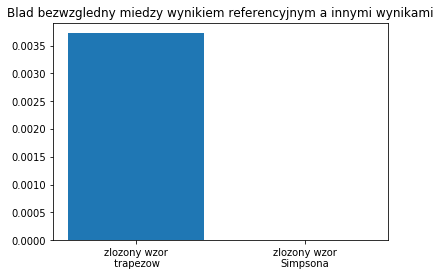

Do wyniku referencyjnego bardziej zblizony jest wynik metody zlozonego wzoru Simpsona, ale oba wyniki sa zblizonego do referencyjnego.


In [2]:

#zad 2
from sympy import Symbol
from math import sqrt, pi, e
from scipy.optimize import newton
import pylab

funkcja = lambda i : (1/(sqrt(2*pi))) * pow(e, ((-i**2)/2))

#zlozony wzor trapezow
n=10 #liczba podprzedzialow
x = Symbol("x")
a=0
b=x

xi = []
for i in range(0, n+1):
    xi.append(a + (i/n)*(b-a))  

S = 0  #suma iloczynow
for j in range(len(xi)-1):
    S+= ( (((xi[j+1])-(xi[j]))/2) * (funkcja(xi[j]) + funkcja(xi[j+1]))  ) 
  
wynik_trapezy = S
funkcja_trapezy = lambda i : (wynik_trapezy).subs(x,i) - 0.45

#zlozony wzor simpsona
#xi takie samo jak dla metody trapezow
S = 0  
for j in range(len(xi)-1):
    S+= ((xi[j+1] - xi[j])/6)  * (funkcja(xi[j]) + 4*funkcja((xi[j]+xi[j+1])/2) + funkcja(xi[j+1]))
wynik_simpson = S
funkcja_simpson = lambda i : (wynik_simpson).subs(x,i) - 0.45


#obliczam x z newtona i  simpsona
m_zer_tr = newton(funkcja_trapezy, 0.5, tol=10**(-5))
print("\nx dla wzoru zlozonego trapezow: ")
print(m_zer_tr)  

m_zer_simps = newton(funkcja_simpson, 0.5, tol=10**(-5))
print("\nx dla wzoru zlozonego Simpsona: ")
print(m_zer_simps)

referencyjna = 1.64485  #obliczona z wykresu funkcji pierwotnej na integral-calculator.com, poniwaz pakiet scip.stats.norm nie dzialal

numery = [0,1]
roznice=[abs(referencyjna - m_zer_tr), abs(referencyjna - m_zer_simps)]
print(roznice)

etykiety = ["zlozony wzor\n trapezow", "zlozony wzor\nSimpsona"]
pylab.title('Blad bezwzgledny miedzy wynikiem referencyjnym a innymi wynikami')
pylab.bar(numery, roznice, width=0.8, align='center')
pylab.xticks(numery, etykiety)
pylab.show()

print('Do wyniku referencyjnego bardziej zblizony jest wynik metody zlozonego wzoru Simpsona, ale oba wyniki sa zblizonego do referencyjnego.')


In [3]:

#zad 3
from scipy.interpolate import interp1d
from scipy.integrate import romberg

czas = [0.0, 0.5, 1.0, 2.0, 3.0, 4.0]
wektor_przyspieszen = [-4.5, -4.5, -2.3, -1.0, -0.5, 0.0]

#mamy t i a(t) w wektorach - przyblizamy z nich funkcje a(t) dla ogolnego t
funkcja_przyspieszenia = interp1d(czas, wektor_przyspieszen) 

v_k=0   #tyle wynosi stala calkowania - C

#calkujemy pierwszy raz - na przedziale od 4 do t, v(4)=0, wiec zostaje v(t)
#to jest funkcja predkosci od czasu, ktora potem znowu calkujemy
predkosc_chwilowa = lambda t : romberg(funkcja_przyspieszenia, 4.0, t, tol=10**(-5), divmax=15)


droga_w_0 = 0 #dopiero zaczynamy hamowac

#calkujemy drugi raz (teraz po funkcji predkosci otrzymanej z poprzedniego calkowania), na przedziale od 0 do 4, zeby otrzymac droge
droga_hamowania = romberg(predkosc_chwilowa, 0, 4, tol=10**(-5), divmax=15)

droga_w_05 = romberg(predkosc_chwilowa, 0, 0.5, tol=10**(-5), divmax=15)
predkosc_srednia=  droga_w_05 * 2
print("droga hamowania: ")
print(droga_hamowania)

print("\npredkosc srednia w przedziale t=[0, 0.5] : ")
print(predkosc_srednia)



droga hamowania: 
6.825000657879888

predkosc srednia w przedziale t=[0, 0.5] : 
5.47499681148069


In [ ]:
#zad 4

from sympy import Symbol, Derivative, sin, sqrt
from scipy.integrate import romberg
from math import pi
import matplotlib.pyplot as plt
A = 0.1
T = 0.2

x = Symbol('x')
funkcja =  A * sin(2 * pi * x * (1/T))

#przeksztalcanie funkcji do odpowiedniej postaci na dlugosc krzywej
pochodna = Derivative(funkcja,x)
poch_kwadrat = pochodna **2
pod_pierwiastkiem = poch_kwadrat + 1
spierwiastkowana = sqrt(pod_pierwiastkiem)


#zlozony wzor trapezow
n=100 #liczba podprzedzialow
a=0
b=4.8


xi = []
for i in range(0, n+1):
    xi.append(a + (i/n)*(b-a)) 

S = 0  #suma iloczynow
for j in range(len(xi)-1):
    S+= ( (((xi[j+1])-(xi[j]))/2) * ( spierwiastkowana.doit().subs({x:xi[j]}) + spierwiastkowana.doit().subs({x:xi[j+1]})  ) )

wynik_trapezy = S
print('\nwynik trapezy - wzor zlozony: ')
print(wynik_trapezy)
funkcja_trapezy = lambda i : (wynik_trapezy)


#zlozony wzor simpsona
S = 0  
for j in range(len(xi)-1):
    S+= ((xi[j+1] - xi[j])/6)  * (spierwiastkowana.doit().subs({x:xi[j]}) + 4*spierwiastkowana.doit().subs({x:((xi[j]+xi[j+1])/2)}) +spierwiastkowana.doit().subs({x:xi[j+1]}))
wynik_simpson = S
print('\nwynik Simpson - wzor zlozony: ')
print(wynik_simpson)
funkcja_simpson = lambda i : (wynik_simpson)

do_romberga = lambda i: spierwiastkowana.doit().subs({x:i})
wynik_romberg = romberg(do_romberga, 0, 4.8)
print('\nwynik romberg: ')
print(wynik_romberg)

print('\nWynik otrzymany przy pomocy programu wolphram alpha wynosi 11.0635 - wartosc referencyjna')
print('\nNajblizsze temu wynikowi sa wyniki otrzymane metoda zlozonego wzoru trapezow i zlozonego wzoru Simpsona, w obu dla 100 podprzedzialow')
print('\nOd tych wynikow najbardziej rozni sie wynik uzyskany metoda Romberga, wiec w tym przypadku mozemy uznac te metode za najmniej dokladna')

n_liczba=100
trapez_wyniki=[]
simpson_wyniki=[]
n_ilosc=[]
wart_ref=[]

for n in range (1,n_liczba):
    wart_ref.append(11.0635)
    n_ilosc.append(n)

    xi = []
    for i in range(0, n+1):
        xi.append(a + (i/n)*(b-a)) 
    
    #zlozony wzor trapezu
    S = 0  #suma iloczynow
    for j in range(len(xi)-1):
        S+= ( (((xi[j+1])-(xi[j]))/2) * ( spierwiastkowana.doit().subs({x:xi[j]}) + spierwiastkowana.doit().subs({x:xi[j+1]})  ) )
    trapez_wyniki.append(S)

    #zlozony wzor simpsona
    S = 0  
    for j in range(len(xi)-1):
        S+= ((xi[j+1] - xi[j])/6)  * (spierwiastkowana.doit().subs({x:xi[j]}) + 4*spierwiastkowana.doit().subs({x:((xi[j]+xi[j+1])/2)}) +spierwiastkowana.doit().subs({x:xi[j+1]}))
    simpson_wyniki.append(S)
    

plt.plot(n_ilosc, trapez_wyniki, label="trapez")
plt.plot(n_ilosc, simpson_wyniki, label="simpson")
plt.plot(n_ilosc, wart_ref, label="wartosc referencyjna")
plt.xlabel('wynik')
plt.ylabel('liczba podprzedzialow calkowania')
plt.legend(loc="upper left", bbox_to_anchor=[0, 1],
           ncol=3, shadow=True, title="Legenda")

print('Z wykresu wynika, ze im wiecej przedzialow, tym bardziej wynik jest zblizony do wyliczonej wartosci referencyjnej dla obu metod')
print('\nDla niektorych n, mimo wielu poprzedzialow, wystepuja wartosci znacznie odbiegajace od referencyjnej -  na wykresie wystepuja gorki i doliny')
print('\n Przy niewielkim n wyniki z metody simpsona bardzo znaczaco odbiegaja od wartosci referencyjnej')







wynik trapezy - wzor zlozony: 
11.0634847808957

wynik Simpson - wzor zlozony: 
11.0634847808956

wynik romberg: 
15.8251598854830

Wynik otrzymany przy pomocy programu wolphram alpha wynosi 11.0635 - wartosc referencyjna

Najblizsze temu wynikowi sa wyniki otrzymane metoda zlozonego wzoru trapezow i zlozonego wzoru Simpsona, w obu dla 100 podprzedzialow

Od tych wynikow najbardziej rozni sie wynik uzyskany metoda Romberga, wiec w tym przypadku mozemy uznac te metode za najmniej dokladna
